In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

In [14]:
# Initializing

m_s = 50    # Rocket structural mass
g = 9.81
rho = 1.091 # air density
r = 0.5     # rocket cross-sectional radius
A = math.pi*r**2
v_e = 325   # exhaust speed
c_d = 0.15  # drag coefficient
mp_o = 100  # initial fuel weight
m_r = 20    # fuel burn rate

dt = 0.05   # time step
t_f = 40    # estimated final time

N = int((t_f/dt) + 1) # Number of steps

t = np.linspace(0, t_f, N)

In [15]:
h = np.zeros_like(t)
v = np.zeros_like(t)
mp = np.zeros_like(t)
#dv_t = np.zeros_like(t)

In [16]:
for i in range(N):
    mp[i] = mp_o - (t[i]*m_r)
    if t[i]>=5:
        mp[i] = 0.0
        m_r = 0.0
    dv_t= -g + (((m_r*v_e) - (0.5*rho*c_d*A*v[i]*abs(v[i])))/(m_s + mp[i]))
    v[i+1] = v[i] + dv_t*dt
    h[i+1] = h[i] + (dt*v[i])
    if h[i+1]<0:
        break

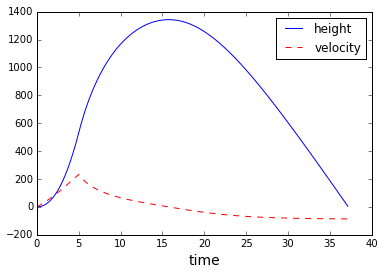

In [17]:
plt.plot(t[0:i],h[0:i])
plt.plot(t[0:i],v[0:i], 'r--')
plt.xlabel('time', fontsize=14)
plt.legend(["height","velocity"])

In [18]:
print("max height = ", max(h[0:i]))
print("total time = ", t[i])
print("max velocity = ", max(v[0:i]))

max height =  1342.3255657
total time =  37.2
max velocity =  232.277383387
